In [150]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [178]:
#apple, banana, plum, pepper, cherry, grape, tomato, potato, pear, peach
CATEGORIES = ["Apple Braeburn","Apple Crimson Snow","Apple Golden 1","Apple Golden 2","Apple Golden 3",
              "Apple Granny Smith","Apple Pink Lady","Apple Red 1", "Apple Red 2","Apple Red 3","Apple Red Delicious",
              "Apple Red Yellow 1","Apple Red Yellow 2","Banana",
              "Plum","Plum 2", "Plum 3",
            #  "Pepper Yellow","Pepper Red","Pepper Green",
           #   "Cherry 1", "Cherry 2", "Cherry Rainier", "Cherry Wax Black", "Cherry Wax Red","Cherry Wax Yellow",
          #    "Grape Blue", "Grape Pink", "Grape White", "Grape White 2", "Grape White 3", "Grape White 4",
         #    "Tomato 1","Tomato 2","Tomato 3","Tomato 4","Tomato Yellow","Tomato Maroon",
        #     "Pear","Pear Abate","Pear Forelle","Pear Kaiser","Pear Monster","Pear Red","Pear Williams",
       #      "Peach","Peach 2","Peach Flat"
             
             ]

    
DATADIR = "../dataset/fruits-360/Training"
#CATEGORIES = os.listdir(DATADIR)
#TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
TYPES = ["Apple", "Banana","Plum"]
fruits= {}
for cat in CATEGORIES:
    for typ in TYPES:
        if(cat.startswith(typ)):
            fruits[cat] = typ

#CATEGORIES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]



In [179]:
fruits

{'Apple Braeburn': 'Apple',
 'Apple Crimson Snow': 'Apple',
 'Apple Golden 1': 'Apple',
 'Apple Golden 2': 'Apple',
 'Apple Golden 3': 'Apple',
 'Apple Granny Smith': 'Apple',
 'Apple Pink Lady': 'Apple',
 'Apple Red 1': 'Apple',
 'Apple Red 2': 'Apple',
 'Apple Red 3': 'Apple',
 'Apple Red Delicious': 'Apple',
 'Apple Red Yellow 1': 'Apple',
 'Apple Red Yellow 2': 'Apple',
 'Banana': 'Banana',
 'Plum': 'Plum',
 'Plum 2': 'Plum',
 'Plum 3': 'Plum'}

In [191]:
for category in CATEGORIES:  # do dogs and cats
    print(category)

    path = os.path.join(DATADIR,category)  # create path to dogs and cats
  


Apple Braeburn
Apple Crimson Snow
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith
Apple Pink Lady
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious
Apple Red Yellow 1
Apple Red Yellow 2
Banana
Plum
Plum 2
Plum 3


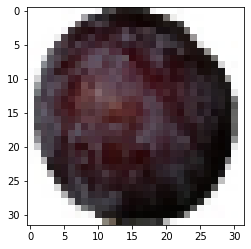

In [186]:
path = os.path.join(DATADIR,"Plum")  # create path to dogs and cats
img_array = cv2.imread(os.path.join(path,img) )  # convert to array
img_array = cv2.resize(img_array, (32, 32))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array)  # graph it

In [181]:
training_data = []
IMG_SIZE = 32

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        #class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        class_num = TYPES.index(fruits[category]) 
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

random.shuffle(training_data)

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = np.array(X)
y = np.array(y)
X = X/255.0

X

100%|██████████████████████████████████████| 900/900 [00:00<00:00, 1224.34it/s]


8661


array([[[[1.        , 0.99607843, 0.98039216],
         [0.99215686, 0.99607843, 1.        ],
         [0.99607843, 1.        , 0.98823529],
         ...,
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 0.99215686],
         [0.99607843, 0.99607843, 1.        ],
         ...,
         [0.99607843, 1.        , 0.97647059],
         [1.        , 1.        , 0.99607843],
         [1.        , 1.        , 1.        ]],

        [[0.99607843, 1.        , 1.        ],
         [1.        , 1.        , 0.99215686],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 0.99607843, 0.98431373],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 0.99215686, 0.99215686]

In [182]:
DATADIR_test = "../dataset/fruits-360/Test"
CATEGORIES_test = ["Apple Braeburn","Apple Crimson Snow","Apple Golden 1","Apple Golden 2","Apple Golden 3",
              "Apple Granny Smith","Apple Pink Lady","Apple Red 1", "Apple Red 2","Apple Red 3","Apple Red Delicious",
              "Apple Red Yellow 1","Apple Red Yellow 2","Banana",
              #"Plum","Plum 2", "Plum 3",
            #  "Pepper Yellow","Pepper Red","Pepper Green",
           #   "Cherry 1", "Cherry 2", "Cherry Rainier", "Cherry Wax Black", "Cherry Wax Red","Cherry Wax Yellow",
          #    "Grape Blue", "Grape Pink", "Grape White", "Grape White 2", "Grape White 3", "Grape White 4",
         #    "Tomato 1","Tomato 2","Tomato 3","Tomato 4","Tomato Yellow","Tomato Maroon",
        #     "Pear","Pear Abate","Pear Forelle","Pear Kaiser","Pear Monster","Pear Red","Pear Williams",
       #      "Peach","Peach 2","Peach Flat"
             
             ]

IMG_SIZE = 32

#new_array_test = cv2.resize(img_array_test, (IMG_SIZE, IMG_SIZE))


test_data = []
def create_test_data():
    for category in CATEGORIES_test:  # do dogs and cats

        path = os.path.join(DATADIR_test,category)  # create path to dogs and cats
    #    class_num = CATEGORIES_test.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        class_num = TYPES.index(fruits[category]) 

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                
                img_array_test = cv2.imread(os.path.join(path,img) )  # convert to array
                new_array_test = cv2.resize(img_array_test, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_array_test = cv2.cvtColor(new_array_test, cv2.COLOR_BGR2RGB)
                test_data.append([new_array_test, class_num])  # add this to our training_data
                
                #img_array_test = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                #new_array_test = cv2.resize(img_array_test, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #test_data.append([new_array_test, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

import random

random.shuffle(test_data)

X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

#X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test/255.0

X_test

test_data


100%|██████████████████████████████████████| 166/166 [00:00<00:00, 2156.49it/s]


2300


[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 254],
          [255, 255, 253],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 254, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 254],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 254],
          [255, 255, 252],
          [254, 254, 255],
          ...,
          [255, 255, 253],
          [254, 254, 254],
          [255, 255, 255]],
  
         [[254, 255, 255],
          [254, 255, 249],
          [254, 253, 252],
          ...,
          [255, 255, 253],
          [254, 254, 254],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [183]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
#date = datetime.now()
#date = date.strftime("%d-%m-%Y-%H-%M-%S")
#NAME = "Fruits-64x2-CNN-{}".format(date)
NAME = "Fruits-64x2-CNN-{}".format(datetime.now().strftime("%d%m%Y-%H%M%S"))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X,
          y, 
          batch_size=32, epochs=10, validation_split=0.3,     
          validation_data = (X_test, y_test),
          callbacks=[tensorboard]
         )

Epoch 1/10


176/190 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.0000e+ - ETA: 27s - loss: 1.3109 - accuracy: 0.0156   - ETA: 30s - loss: 1.0216 - accuracy: 0.125 - ETA: 31s - loss: 0.8607 - accuracy: 0.296 - ETA: 37s - loss: 0.8069 - accuracy: 0.387 - ETA: 38s - loss: 0.7591 - accuracy: 0.442 - ETA: 39s - loss: 0.6963 - accuracy: 0.495 - ETA: 38s - loss: 0.6111 - accuracy: 0.507 - ETA: 39s - loss: 0.5465 - accuracy: 0.496 - ETA: 39s - loss: 0.4628 - accuracy: 0.512 - ETA: 39s - loss: 0.4033 - accuracy: 0.534 - ETA: 39s - loss: 0.3121 - accuracy: 0.546 - ETA: 39s - loss: 0.2296 - accuracy: 0.552 - ETA: 38s - loss: 0.1329 - accuracy: 0.569 - ETA: 38s - loss: -0.0398 - accuracy: 0.58 - ETA: 38s - loss: -0.0526 - accuracy: 0.56 - ETA: 38s - loss: -0.3418 - accuracy: 0.56 - ETA: 38s - loss: -0.6381 - accuracy: 0.57 - ETA: 37s - loss: -0.7674 - accuracy: 0.57 - ETA: 37s - loss: -1.0203 - accuracy: 0.58 - ETA: 36s - loss: -1.4765 - accuracy: 0.58 - ETA: 36s - loss: -1.5958 - a

190/190 [==============================] - ETA: 2s - loss: -21042.1191 - accuracy: 0.635 - ETA: 2s - loss: -21032.8691 - accuracy: 0.635 - ETA: 2s - loss: -21730.7480 - accuracy: 0.635 - ETA: 1s - loss: -22784.0254 - accuracy: 0.636 - ETA: 1s - loss: -22988.6738 - accuracy: 0.637 - ETA: 1s - loss: -23441.4551 - accuracy: 0.638 - ETA: 1s - loss: -24589.7344 - accuracy: 0.637 - ETA: 1s - loss: -24497.5820 - accuracy: 0.637 - ETA: 0s - loss: -25344.5840 - accuracy: 0.637 - ETA: 0s - loss: -25644.8574 - accuracy: 0.636 - ETA: 0s - loss: -26106.7910 - accuracy: 0.637 - ETA: 0s - loss: -26415.8457 - accuracy: 0.638 - ETA: 0s - loss: -27407.1582 - accuracy: 0.638 - ETA: 0s - loss: -27848.7598 - accuracy: 0.638 - 39s 206ms/step - loss: -27848.7598 - accuracy: 0.6384 - val_loss: -180947.9844 - val_accuracy: 0.6660
Epoch 2/10


164/190 [========================>.....] - ETA: 0s - loss: -81531.7812 - accuracy: 0.718 - ETA: 19s - loss: -160426.2344 - accuracy: 0.718 - ETA: 25s - loss: -171284.5625 - accuracy: 0.739 - ETA: 27s - loss: -171906.7188 - accuracy: 0.695 - ETA: 31s - loss: -162299.5469 - accuracy: 0.656 - ETA: 32s - loss: -167898.6094 - accuracy: 0.625 - ETA: 34s - loss: -201750.0781 - accuracy: 0.611 - ETA: 36s - loss: -187609.5000 - accuracy: 0.628 - ETA: 38s - loss: -209484.7656 - accuracy: 0.625 - ETA: 38s - loss: -207833.3281 - accuracy: 0.628 - ETA: 38s - loss: -224887.4062 - accuracy: 0.619 - ETA: 40s - loss: -244011.2031 - accuracy: 0.625 - ETA: 40s - loss: -255152.5625 - accuracy: 0.617 - ETA: 41s - loss: -276421.4062 - accuracy: 0.604 - ETA: 41s - loss: -275598.1562 - accuracy: 0.602 - ETA: 41s - loss: -272100.2188 - accuracy: 0.589 - ETA: 42s - loss: -274732.2812 - accuracy: 0.580 - ETA: 42s - loss: -270592.0312 - accuracy: 0.574 - ETA: 42s - loss: -275217.7500 - accuracy: 0.577 - ETA: 43s 

190/190 [==============================] - ETA: 6s - loss: -1561976.8750 - accuracy: 0.641 - ETA: 6s - loss: -1577988.3750 - accuracy: 0.642 - ETA: 5s - loss: -1588870.7500 - accuracy: 0.641 - ETA: 5s - loss: -1600258.5000 - accuracy: 0.641 - ETA: 5s - loss: -1643352.7500 - accuracy: 0.641 - ETA: 5s - loss: -1647324.0000 - accuracy: 0.641 - ETA: 4s - loss: -1680091.3750 - accuracy: 0.641 - ETA: 4s - loss: -1732051.8750 - accuracy: 0.640 - ETA: 4s - loss: -1735347.2500 - accuracy: 0.640 - ETA: 4s - loss: -1762385.6250 - accuracy: 0.640 - ETA: 3s - loss: -1758839.2500 - accuracy: 0.641 - ETA: 3s - loss: -1777228.7500 - accuracy: 0.641 - ETA: 3s - loss: -1767460.5000 - accuracy: 0.641 - ETA: 3s - loss: -1760071.0000 - accuracy: 0.642 - ETA: 2s - loss: -1771270.2500 - accuracy: 0.642 - ETA: 2s - loss: -1804068.1250 - accuracy: 0.641 - ETA: 2s - loss: -1820569.5000 - accuracy: 0.642 - ETA: 1s - loss: -1840359.8750 - accuracy: 0.643 - ETA: 1s - loss: -1847323.5000 - accuracy: 0.643 - ETA: 1s

161/190 [========================>.....] - ETA: 0s - loss: -1676267.5000 - accuracy: 0.781 - ETA: 18s - loss: -5158289.0000 - accuracy: 0.70 - ETA: 24s - loss: -8475783.0000 - accuracy: 0.62 - ETA: 27s - loss: -8088150.5000 - accuracy: 0.63 - ETA: 29s - loss: -8950687.0000 - accuracy: 0.62 - ETA: 32s - loss: -8797954.0000 - accuracy: 0.63 - ETA: 36s - loss: -9416461.0000 - accuracy: 0.61 - ETA: 38s - loss: -8582299.0000 - accuracy: 0.61 - ETA: 40s - loss: -8192965.5000 - accuracy: 0.60 - ETA: 41s - loss: -7951456.0000 - accuracy: 0.59 - ETA: 42s - loss: -8992777.0000 - accuracy: 0.58 - ETA: 42s - loss: -8894852.0000 - accuracy: 0.59 - ETA: 42s - loss: -9103452.0000 - accuracy: 0.60 - ETA: 43s - loss: -8998517.0000 - accuracy: 0.60 - ETA: 42s - loss: -8605916.0000 - accuracy: 0.60 - ETA: 43s - loss: -8252487.5000 - accuracy: 0.61 - ETA: 42s - loss: -8555833.0000 - accuracy: 0.61 - ETA: 42s - loss: -8406985.0000 - accuracy: 0.61 - ETA: 42s - loss: -8530424.0000 - accuracy: 0.61 - ETA: 42

190/190 [==============================] - ETA: 6s - loss: -15764741.0000 - accuracy: 0.64 - ETA: 5s - loss: -15811080.0000 - accuracy: 0.64 - ETA: 5s - loss: -15900811.0000 - accuracy: 0.64 - ETA: 5s - loss: -15987990.0000 - accuracy: 0.64 - ETA: 5s - loss: -16032159.0000 - accuracy: 0.64 - ETA: 4s - loss: -16047614.0000 - accuracy: 0.64 - ETA: 4s - loss: -16165690.0000 - accuracy: 0.64 - ETA: 4s - loss: -16136905.0000 - accuracy: 0.64 - ETA: 4s - loss: -16132763.0000 - accuracy: 0.64 - ETA: 4s - loss: -16159518.0000 - accuracy: 0.64 - ETA: 3s - loss: -16125525.0000 - accuracy: 0.64 - ETA: 3s - loss: -16390718.0000 - accuracy: 0.64 - ETA: 3s - loss: -16512307.0000 - accuracy: 0.64 - ETA: 3s - loss: -16712730.0000 - accuracy: 0.64 - ETA: 3s - loss: -16964248.0000 - accuracy: 0.64 - ETA: 2s - loss: -16896718.0000 - accuracy: 0.64 - ETA: 2s - loss: -17008410.0000 - accuracy: 0.64 - ETA: 2s - loss: -17175366.0000 - accuracy: 0.64 - ETA: 2s - loss: -17316308.0000 - accuracy: 0.64 - ETA: 1s

158/190 [=======================>......] - ETA: 0s - loss: -14692086.0000 - accuracy: 0.59 - ETA: 18s - loss: -16781492.0000 - accuracy: 0.593 - ETA: 26s - loss: -16001660.0000 - accuracy: 0.614 - ETA: 29s - loss: -29547084.0000 - accuracy: 0.625 - ETA: 32s - loss: -31270464.0000 - accuracy: 0.612 - ETA: 33s - loss: -30981366.0000 - accuracy: 0.619 - ETA: 33s - loss: -29995408.0000 - accuracy: 0.616 - ETA: 34s - loss: -30425500.0000 - accuracy: 0.621 - ETA: 34s - loss: -31950684.0000 - accuracy: 0.614 - ETA: 34s - loss: -27863834.0000 - accuracy: 0.618 - ETA: 34s - loss: -26218178.0000 - accuracy: 0.619 - ETA: 34s - loss: -29492440.0000 - accuracy: 0.619 - ETA: 34s - loss: -31063970.0000 - accuracy: 0.622 - ETA: 34s - loss: -33440384.0000 - accuracy: 0.618 - ETA: 34s - loss: -29705186.0000 - accuracy: 0.622 - ETA: 34s - loss: -30481840.0000 - accuracy: 0.630 - ETA: 34s - loss: -30321572.0000 - accuracy: 0.630 - ETA: 34s - loss: -30152882.0000 - accuracy: 0.640 - ETA: 34s - loss: -31248

190/190 [==============================] - ETA: 5s - loss: -64978924.0000 - accuracy: 0.64 - ETA: 5s - loss: -65031092.0000 - accuracy: 0.65 - ETA: 5s - loss: -65551640.0000 - accuracy: 0.65 - ETA: 5s - loss: -65685392.0000 - accuracy: 0.65 - ETA: 4s - loss: -65594860.0000 - accuracy: 0.65 - ETA: 4s - loss: -65999272.0000 - accuracy: 0.65 - ETA: 4s - loss: -66217152.0000 - accuracy: 0.65 - ETA: 4s - loss: -66384728.0000 - accuracy: 0.65 - ETA: 4s - loss: -67148680.0000 - accuracy: 0.65 - ETA: 4s - loss: -67864192.0000 - accuracy: 0.65 - ETA: 3s - loss: -67974728.0000 - accuracy: 0.65 - ETA: 3s - loss: -68375064.0000 - accuracy: 0.65 - ETA: 3s - loss: -68925880.0000 - accuracy: 0.65 - ETA: 3s - loss: -69668872.0000 - accuracy: 0.65 - ETA: 3s - loss: -70210904.0000 - accuracy: 0.65 - ETA: 2s - loss: -69815912.0000 - accuracy: 0.65 - ETA: 2s - loss: -70502512.0000 - accuracy: 0.65 - ETA: 2s - loss: -72100488.0000 - accuracy: 0.64 - ETA: 2s - loss: -73079648.0000 - accuracy: 0.64 - ETA: 2s

157/190 [=======================>......] - ETA: 0s - loss: -133962400.0000 - accuracy: 0.687 - ETA: 16s - loss: -117006824.0000 - accuracy: 0.71 - ETA: 22s - loss: -97532184.0000 - accuracy: 0.6875 - ETA: 24s - loss: -94610176.0000 - accuracy: 0.687 - ETA: 26s - loss: -98649648.0000 - accuracy: 0.668 - ETA: 28s - loss: -95698600.0000 - accuracy: 0.656 - ETA: 28s - loss: -79953032.0000 - accuracy: 0.669 - ETA: 29s - loss: -82728560.0000 - accuracy: 0.683 - ETA: 29s - loss: -85003104.0000 - accuracy: 0.684 - ETA: 29s - loss: -87357552.0000 - accuracy: 0.687 - ETA: 29s - loss: -86743176.0000 - accuracy: 0.693 - ETA: 29s - loss: -90079072.0000 - accuracy: 0.705 - ETA: 29s - loss: -83446104.0000 - accuracy: 0.697 - ETA: 29s - loss: -83784656.0000 - accuracy: 0.696 - ETA: 29s - loss: -93409520.0000 - accuracy: 0.691 - ETA: 29s - loss: -91812608.0000 - accuracy: 0.695 - ETA: 29s - loss: -93529400.0000 - accuracy: 0.689 - ETA: 29s - loss: -92970600.0000 - accuracy: 0.697 - ETA: 29s - loss: -99

190/190 [==============================] - ETA: 5s - loss: -192443328.0000 - accuracy: 0.651 - ETA: 5s - loss: -191221072.0000 - accuracy: 0.650 - ETA: 5s - loss: -192193744.0000 - accuracy: 0.651 - ETA: 5s - loss: -192366000.0000 - accuracy: 0.650 - ETA: 5s - loss: -192854800.0000 - accuracy: 0.649 - ETA: 4s - loss: -192687616.0000 - accuracy: 0.649 - ETA: 4s - loss: -192956640.0000 - accuracy: 0.650 - ETA: 4s - loss: -192986608.0000 - accuracy: 0.650 - ETA: 4s - loss: -193374224.0000 - accuracy: 0.650 - ETA: 4s - loss: -194287744.0000 - accuracy: 0.650 - ETA: 4s - loss: -193811936.0000 - accuracy: 0.651 - ETA: 3s - loss: -193553728.0000 - accuracy: 0.651 - ETA: 3s - loss: -193843232.0000 - accuracy: 0.651 - ETA: 3s - loss: -194360320.0000 - accuracy: 0.651 - ETA: 3s - loss: -195484912.0000 - accuracy: 0.651 - ETA: 3s - loss: -196160112.0000 - accuracy: 0.651 - ETA: 2s - loss: -196264512.0000 - accuracy: 0.650 - ETA: 2s - loss: -195234112.0000 - accuracy: 0.650 - ETA: 2s - loss: -1958

157/190 [=======================>......] - ETA: 0s - loss: -577283776.0000 - accuracy: 0.531 - ETA: 21s - loss: -501249536.0000 - accuracy: 0.59 - ETA: 27s - loss: -390098912.0000 - accuracy: 0.60 - ETA: 29s - loss: -422823104.0000 - accuracy: 0.56 - ETA: 32s - loss: -444767680.0000 - accuracy: 0.56 - ETA: 32s - loss: -441903520.0000 - accuracy: 0.54 - ETA: 33s - loss: -401892096.0000 - accuracy: 0.56 - ETA: 36s - loss: -370842976.0000 - accuracy: 0.56 - ETA: 36s - loss: -363850304.0000 - accuracy: 0.57 - ETA: 36s - loss: -322588576.0000 - accuracy: 0.60 - ETA: 36s - loss: -326363968.0000 - accuracy: 0.60 - ETA: 37s - loss: -340109952.0000 - accuracy: 0.60 - ETA: 38s - loss: -338964160.0000 - accuracy: 0.61 - ETA: 37s - loss: -346909024.0000 - accuracy: 0.60 - ETA: 37s - loss: -341283040.0000 - accuracy: 0.62 - ETA: 37s - loss: -319689504.0000 - accuracy: 0.62 - ETA: 37s - loss: -322033600.0000 - accuracy: 0.62 - ETA: 37s - loss: -337795264.0000 - accuracy: 0.62 - ETA: 37s - loss: -348

190/190 [==============================] - ETA: 6s - loss: -424553248.0000 - accuracy: 0.645 - ETA: 6s - loss: -428121056.0000 - accuracy: 0.645 - ETA: 6s - loss: -426715040.0000 - accuracy: 0.645 - ETA: 6s - loss: -428960736.0000 - accuracy: 0.645 - ETA: 5s - loss: -429948864.0000 - accuracy: 0.644 - ETA: 5s - loss: -431056864.0000 - accuracy: 0.644 - ETA: 5s - loss: -429988096.0000 - accuracy: 0.645 - ETA: 5s - loss: -433853920.0000 - accuracy: 0.645 - ETA: 5s - loss: -434516512.0000 - accuracy: 0.645 - ETA: 4s - loss: -437278464.0000 - accuracy: 0.646 - ETA: 4s - loss: -436414656.0000 - accuracy: 0.646 - ETA: 4s - loss: -436689792.0000 - accuracy: 0.645 - ETA: 4s - loss: -445457152.0000 - accuracy: 0.644 - ETA: 4s - loss: -445996160.0000 - accuracy: 0.645 - ETA: 3s - loss: -446153216.0000 - accuracy: 0.645 - ETA: 3s - loss: -447860992.0000 - accuracy: 0.645 - ETA: 3s - loss: -444792704.0000 - accuracy: 0.645 - ETA: 3s - loss: -443504128.0000 - accuracy: 0.645 - ETA: 2s - loss: -4460

157/190 [=======================>......] - ETA: 0s - loss: -602675136.0000 - accuracy: 0.593 - ETA: 19s - loss: -642858496.0000 - accuracy: 0.64 - ETA: 25s - loss: -603701248.0000 - accuracy: 0.70 - ETA: 29s - loss: -551852352.0000 - accuracy: 0.70 - ETA: 31s - loss: -628748800.0000 - accuracy: 0.70 - ETA: 33s - loss: -593430208.0000 - accuracy: 0.69 - ETA: 33s - loss: -724066688.0000 - accuracy: 0.66 - ETA: 34s - loss: -743887296.0000 - accuracy: 0.66 - ETA: 34s - loss: -733731328.0000 - accuracy: 0.66 - ETA: 34s - loss: -714081856.0000 - accuracy: 0.66 - ETA: 34s - loss: -701192448.0000 - accuracy: 0.67 - ETA: 34s - loss: -703012352.0000 - accuracy: 0.67 - ETA: 34s - loss: -672154368.0000 - accuracy: 0.65 - ETA: 34s - loss: -672955776.0000 - accuracy: 0.64 - ETA: 34s - loss: -713134272.0000 - accuracy: 0.63 - ETA: 34s - loss: -697255104.0000 - accuracy: 0.62 - ETA: 34s - loss: -743319616.0000 - accuracy: 0.62 - ETA: 34s - loss: -746184576.0000 - accuracy: 0.61 - ETA: 34s - loss: -743

190/190 [==============================] - ETA: 6s - loss: -800441728.0000 - accuracy: 0.650 - ETA: 6s - loss: -802770944.0000 - accuracy: 0.651 - ETA: 6s - loss: -804208704.0000 - accuracy: 0.651 - ETA: 6s - loss: -810143488.0000 - accuracy: 0.651 - ETA: 6s - loss: -819770368.0000 - accuracy: 0.651 - ETA: 5s - loss: -825936000.0000 - accuracy: 0.650 - ETA: 5s - loss: -828342208.0000 - accuracy: 0.650 - ETA: 5s - loss: -824132096.0000 - accuracy: 0.651 - ETA: 5s - loss: -833059392.0000 - accuracy: 0.650 - ETA: 4s - loss: -833044352.0000 - accuracy: 0.651 - ETA: 4s - loss: -837786304.0000 - accuracy: 0.650 - ETA: 4s - loss: -842312128.0000 - accuracy: 0.650 - ETA: 4s - loss: -843610304.0000 - accuracy: 0.650 - ETA: 4s - loss: -842986304.0000 - accuracy: 0.651 - ETA: 3s - loss: -843780352.0000 - accuracy: 0.651 - ETA: 3s - loss: -846153216.0000 - accuracy: 0.651 - ETA: 3s - loss: -850552320.0000 - accuracy: 0.651 - ETA: 3s - loss: -849676864.0000 - accuracy: 0.651 - ETA: 3s - loss: -8483

152/190 [=======================>......] - ETA: 0s - loss: -1100921216.0000 - accuracy: 0.65 - ETA: 21s - loss: -1211170048.0000 - accuracy: 0.656 - ETA: 26s - loss: -1327345664.0000 - accuracy: 0.614 - ETA: 31s - loss: -1112330112.0000 - accuracy: 0.648 - ETA: 34s - loss: -1164282624.0000 - accuracy: 0.643 - ETA: 35s - loss: -1335540096.0000 - accuracy: 0.640 - ETA: 36s - loss: -1141009536.0000 - accuracy: 0.616 - ETA: 36s - loss: -1095022848.0000 - accuracy: 0.640 - ETA: 37s - loss: -1109920640.0000 - accuracy: 0.652 - ETA: 36s - loss: -1040983552.0000 - accuracy: 0.662 - ETA: 36s - loss: -1019016128.0000 - accuracy: 0.673 - ETA: 37s - loss: -990041856.0000 - accuracy: 0.671 - ETA: 37s - loss: -1044326080.0000 - accuracy: 0.675 - ETA: 37s - loss: -1026284928.0000 - accuracy: 0.674 - ETA: 37s - loss: -1045898624.0000 - accuracy: 0.675 - ETA: 38s - loss: -1039793152.0000 - accuracy: 0.685 - ETA: 39s - loss: -1056126976.0000 - accuracy: 0.683 - ETA: 40s - loss: -1050509760.0000 - accura

190/190 [==============================] - ETA: 8s - loss: -1441594752.0000 - accuracy: 0.64 - ETA: 8s - loss: -1441360128.0000 - accuracy: 0.64 - ETA: 7s - loss: -1442651904.0000 - accuracy: 0.64 - ETA: 7s - loss: -1437766272.0000 - accuracy: 0.64 - ETA: 7s - loss: -1435613696.0000 - accuracy: 0.64 - ETA: 7s - loss: -1430831360.0000 - accuracy: 0.64 - ETA: 6s - loss: -1435254400.0000 - accuracy: 0.64 - ETA: 6s - loss: -1433996544.0000 - accuracy: 0.64 - ETA: 6s - loss: -1426537472.0000 - accuracy: 0.64 - ETA: 6s - loss: -1427402624.0000 - accuracy: 0.64 - ETA: 6s - loss: -1430113920.0000 - accuracy: 0.64 - ETA: 5s - loss: -1436970752.0000 - accuracy: 0.64 - ETA: 5s - loss: -1439589888.0000 - accuracy: 0.64 - ETA: 5s - loss: -1436437888.0000 - accuracy: 0.64 - ETA: 5s - loss: -1436767744.0000 - accuracy: 0.64 - ETA: 4s - loss: -1440531840.0000 - accuracy: 0.64 - ETA: 4s - loss: -1443140352.0000 - accuracy: 0.64 - ETA: 4s - loss: -1446808832.0000 - accuracy: 0.64 - ETA: 4s - loss: -1441

152/190 [=======================>......] - ETA: 0s - loss: -1050850432.0000 - accuracy: 0.59 - ETA: 18s - loss: -1132838656.0000 - accuracy: 0.609 - ETA: 24s - loss: -855982528.0000 - accuracy: 0.572 - ETA: 27s - loss: -897533824.0000 - accuracy: 0.61 - ETA: 28s - loss: -1044043776.0000 - accuracy: 0.606 - ETA: 30s - loss: -1190167680.0000 - accuracy: 0.619 - ETA: 30s - loss: -1373096064.0000 - accuracy: 0.625 - ETA: 30s - loss: -1394417152.0000 - accuracy: 0.636 - ETA: 31s - loss: -1328712576.0000 - accuracy: 0.638 - ETA: 31s - loss: -1354007040.0000 - accuracy: 0.643 - ETA: 31s - loss: -1360993024.0000 - accuracy: 0.656 - ETA: 31s - loss: -1537596416.0000 - accuracy: 0.648 - ETA: 31s - loss: -1607382400.0000 - accuracy: 0.651 - ETA: 31s - loss: -1526806912.0000 - accuracy: 0.649 - ETA: 31s - loss: -1590766720.0000 - accuracy: 0.652 - ETA: 32s - loss: -1532198400.0000 - accuracy: 0.648 - ETA: 32s - loss: -1519013120.0000 - accuracy: 0.654 - ETA: 32s - loss: -1639529984.0000 - accuracy

190/190 [==============================] - ETA: 7s - loss: -2255917056.0000 - accuracy: 0.64 - ETA: 7s - loss: -2252480768.0000 - accuracy: 0.64 - ETA: 7s - loss: -2262149376.0000 - accuracy: 0.64 - ETA: 6s - loss: -2260788480.0000 - accuracy: 0.64 - ETA: 6s - loss: -2238930176.0000 - accuracy: 0.64 - ETA: 6s - loss: -2238421248.0000 - accuracy: 0.64 - ETA: 6s - loss: -2246008576.0000 - accuracy: 0.64 - ETA: 6s - loss: -2250275328.0000 - accuracy: 0.64 - ETA: 5s - loss: -2234549504.0000 - accuracy: 0.64 - ETA: 5s - loss: -2235672576.0000 - accuracy: 0.64 - ETA: 5s - loss: -2223662080.0000 - accuracy: 0.64 - ETA: 5s - loss: -2234947072.0000 - accuracy: 0.64 - ETA: 5s - loss: -2239775232.0000 - accuracy: 0.64 - ETA: 4s - loss: -2243079424.0000 - accuracy: 0.64 - ETA: 4s - loss: -2251642880.0000 - accuracy: 0.64 - ETA: 4s - loss: -2255596800.0000 - accuracy: 0.64 - ETA: 4s - loss: -2266607104.0000 - accuracy: 0.64 - ETA: 4s - loss: -2295983872.0000 - accuracy: 0.64 - ETA: 3s - loss: -2301

152/190 [=======================>......] - ETA: 0s - loss: -3749446144.0000 - accuracy: 0.53 - ETA: 18s - loss: -2685699584.0000 - accuracy: 0.609 - ETA: 24s - loss: -2621327104.0000 - accuracy: 0.635 - ETA: 26s - loss: -2067633280.0000 - accuracy: 0.656 - ETA: 28s - loss: -2493428480.0000 - accuracy: 0.681 - ETA: 29s - loss: -2295374848.0000 - accuracy: 0.692 - ETA: 30s - loss: -2108484224.0000 - accuracy: 0.700 - ETA: 30s - loss: -2145172608.0000 - accuracy: 0.718 - ETA: 31s - loss: -2233228032.0000 - accuracy: 0.711 - ETA: 31s - loss: -2024916992.0000 - accuracy: 0.721 - ETA: 31s - loss: -2385397504.0000 - accuracy: 0.715 - ETA: 31s - loss: -2304677632.0000 - accuracy: 0.724 - ETA: 32s - loss: -2611325440.0000 - accuracy: 0.718 - ETA: 32s - loss: -2810664192.0000 - accuracy: 0.709 - ETA: 32s - loss: -2914983680.0000 - accuracy: 0.706 - ETA: 32s - loss: -2884982784.0000 - accuracy: 0.699 - ETA: 32s - loss: -2767556864.0000 - accuracy: 0.700 - ETA: 32s - loss: -2710155008.0000 - accur

190/190 [==============================] - ETA: 7s - loss: -3187771904.0000 - accuracy: 0.65 - ETA: 7s - loss: -3196273152.0000 - accuracy: 0.65 - ETA: 7s - loss: -3216565248.0000 - accuracy: 0.65 - ETA: 7s - loss: -3221123072.0000 - accuracy: 0.65 - ETA: 7s - loss: -3213228288.0000 - accuracy: 0.65 - ETA: 6s - loss: -3217149696.0000 - accuracy: 0.65 - ETA: 6s - loss: -3222684928.0000 - accuracy: 0.65 - ETA: 6s - loss: -3240508672.0000 - accuracy: 0.65 - ETA: 6s - loss: -3270349056.0000 - accuracy: 0.65 - ETA: 6s - loss: -3280169984.0000 - accuracy: 0.65 - ETA: 5s - loss: -3282331648.0000 - accuracy: 0.65 - ETA: 5s - loss: -3285865216.0000 - accuracy: 0.65 - ETA: 5s - loss: -3291355648.0000 - accuracy: 0.65 - ETA: 5s - loss: -3297533952.0000 - accuracy: 0.65 - ETA: 5s - loss: -3300742144.0000 - accuracy: 0.65 - ETA: 4s - loss: -3302334976.0000 - accuracy: 0.65 - ETA: 4s - loss: -3317369600.0000 - accuracy: 0.65 - ETA: 4s - loss: -3339300864.0000 - accuracy: 0.65 - ETA: 4s - loss: -3354

In [91]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))
            
            
            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
            model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

            training_history = model.fit(X,
              y, 
              batch_size=32, epochs=10, validation_split=0.3,     
              validation_data = (X_test, y_test),
              callbacks=[tensorboard])

SyntaxError: unexpected EOF while parsing (<ipython-input-91-c1ccc66ebb1f>, line 41)

In [20]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

Fruits-1-conv-32-nodes-0-dense-29052020-162541
Fruits-2-conv-32-nodes-0-dense-29052020-162541
Fruits-3-conv-32-nodes-0-dense-29052020-162541
Fruits-1-conv-64-nodes-0-dense-29052020-162541
Fruits-2-conv-64-nodes-0-dense-29052020-162541
Fruits-3-conv-64-nodes-0-dense-29052020-162541
Fruits-1-conv-128-nodes-0-dense-29052020-162541
Fruits-2-conv-128-nodes-0-dense-29052020-162541
Fruits-3-conv-128-nodes-0-dense-29052020-162541
Fruits-1-conv-32-nodes-1-dense-29052020-162541
Fruits-2-conv-32-nodes-1-dense-29052020-162541
Fruits-3-conv-32-nodes-1-dense-29052020-162541
Fruits-1-conv-64-nodes-1-dense-29052020-162541
Fruits-2-conv-64-nodes-1-dense-29052020-162541
Fruits-3-conv-64-nodes-1-dense-29052020-162541
Fruits-1-conv-128-nodes-1-dense-29052020-162541
Fruits-2-conv-128-nodes-1-dense-29052020-162541
Fruits-3-conv-128-nodes-1-dense-29052020-162541
Fruits-1-conv-32-nodes-2-dense-29052020-162541
Fruits-2-conv-32-nodes-2-dense-29052020-162541
Fruits-3-conv-32-nodes-2-dense-29052020-162541
Fruits-

In [22]:
print("Average test loss: ", np.average(model.history['loss']))

TypeError: 'History' object is not subscriptable

In [81]:
len(test_data)

8734

In [82]:
len(training_data)

26105

In [89]:
X.shape

(78315, 32, 32, 1)

In [84]:
X_test.shape

(8734, 32, 32, 1)

In [88]:
y.shape

(26105,)

In [86]:
y_test.shape

(8734,)